# Working with Metadata

In order to work with complex dataset structures you will need to pass additional information
about you data to SDV.

This is done by using a Metadata.

Let's have a quick look at how to do it.

## Load demo data

We will load the demo dataset included in SDV for the rest of the session.

In [1]:
from sdv import load_demo

metadata, tables = load_demo(metadata=True)

A part from the tables dict, this is returning a Metadata object that contains all the information
about our dataset.

In [2]:
metadata

Metadata
  root_path: /home/xals/Projects/MIT/SDV/tutorials
  tables: ['users', 'sessions', 'transactions']
  relationships:
    sessions.user_id -> users.user_id
    transactions.session_id -> sessions.session_id

This Metadata can also be represented by using a dict object:

In [3]:
metadata.to_dict()

{'tables': {'users': {'primary_key': 'user_id',
   'fields': {'user_id': {'type': 'id', 'subtype': 'integer'},
    'country': {'type': 'categorical'},
    'gender': {'type': 'categorical'},
    'age': {'type': 'numerical', 'subtype': 'integer'}}},
  'sessions': {'primary_key': 'session_id',
   'fields': {'session_id': {'type': 'id', 'subtype': 'integer'},
    'user_id': {'ref': {'field': 'user_id', 'table': 'users'},
     'type': 'id',
     'subtype': 'integer'},
    'device': {'type': 'categorical'},
    'os': {'type': 'categorical'}}},
  'transactions': {'primary_key': 'transaction_id',
   'fields': {'transaction_id': {'type': 'id', 'subtype': 'integer'},
    'session_id': {'ref': {'field': 'session_id', 'table': 'sessions'},
     'type': 'id',
     'subtype': 'integer'},
    'timestamp': {'type': 'datetime', 'format': '%Y-%m-%d'},
    'amount': {'type': 'numerical', 'subtype': 'float'},
    'approved': {'type': 'boolean'}}}}}

## Creating a Metadata object from scratch

In this section we will have a look at how to create a Metadata object from scratch.

The simplest way to do it is by populating it passing the tables of your dataset together
with some additional information.

Let's start by creating an empty metadata object.

In [4]:
from sdv import Metadata

new_meta = Metadata()

Now we can start by adding the parent table from our dataset, `users`,
indicating that the primary key is the field called `user_id`.

In [5]:
users_data = tables['users']
new_meta.add_table('users', data=users_data, primary_key='user_id')

Next, let's add the sessions table, indicating that:
- The primary key is the field `session_id`
- The `users` table is parent to this table
- The relationship between the `users` and `sessions` table is created by the field called `user_id`.

In [6]:
sessions_data = tables['sessions']
new_meta.add_table(
    'sessions',
    data=sessions_data,
    primary_key='session_id',
    parent='users',
    foreign_key='user_id'
)

Finally, let's add the transactions table.

In this case, we will pass some additional information to indicate that
the `timestamp` field should be actually parsed and interpreted as a
datetime field.

In [7]:
transactions_fields = {
    'timestamp': {
        'type': 'datetime',
        'format': '%Y-%m-%d'
    }
}
transactions_data = tables['transactions']
new_meta.add_table(
    'transactions',
    transactions_data,
    fields_metadata=transactions_fields,
    primary_key='transaction_id',
    parent='sessions'
)

Let's see what our Metadata looks like right now:

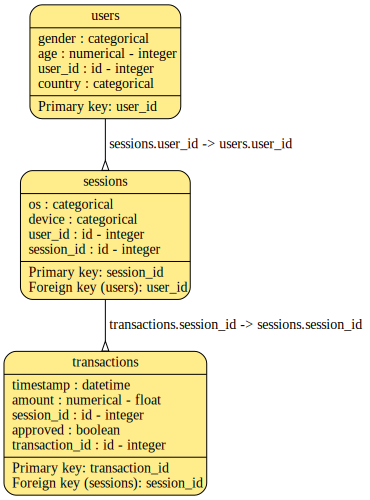

In [8]:
new_meta.visualize()

In [9]:
new_meta.to_dict()

{'tables': {'users': {'fields': {'gender': {'type': 'categorical'},
    'age': {'type': 'numerical', 'subtype': 'integer'},
    'user_id': {'type': 'id', 'subtype': 'integer'},
    'country': {'type': 'categorical'}},
   'primary_key': 'user_id'},
  'sessions': {'fields': {'os': {'type': 'categorical'},
    'device': {'type': 'categorical'},
    'user_id': {'type': 'id',
     'subtype': 'integer',
     'ref': {'table': 'users', 'field': 'user_id'}},
    'session_id': {'type': 'id', 'subtype': 'integer'}},
   'primary_key': 'session_id'},
  'transactions': {'fields': {'timestamp': {'type': 'datetime',
     'format': '%Y-%m-%d'},
    'amount': {'type': 'numerical', 'subtype': 'float'},
    'session_id': {'type': 'id',
     'subtype': 'integer',
     'ref': {'table': 'sessions', 'field': 'session_id'}},
    'approved': {'type': 'boolean'},
    'transaction_id': {'type': 'id', 'subtype': 'integer'}},
   'primary_key': 'transaction_id'}}}

Pretty similar to the original metadata, right?

In [10]:
new_meta.to_dict() == metadata.to_dict()

True

## Saving the Metadata as a JSON file

The Metadata object can also be saved as a JSON file, which later on we can load:

In [11]:
new_meta.to_json('demo_metadata.json')

In [12]:
loaded = Metadata('demo_metadata.json')

In [13]:
loaded.to_dict() == new_meta.to_dict()

True